In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('TATASTEEL_W.csv', parse_dates=['datetime'], index_col=0)
df.head()

,pid,resolution,datetime,open,close,high,low,volume,EMA_50,EMA_100,EMA_200,BBL_14_2.0,BBM_14_2.0,BBU_14_2.0,BBB_14_2.0,RSI_14,PSARl_0.02_0.2,PSARs_0.02_0.2,PSARaf_0.02_0.2,PSARr_0.02_0.2,ISA_9,ISB_26,ITS_9,IKS_26,ICS_26,per_change,volume_high_count,close_count,per_change_count
symbol,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
TATASTEEL,18428,W,2021-03-14,723.650024,704.400024,739.849976,700.700012,12569998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,False,NaN,NaN,NaN,NaN,395.500000,-2.159870,1,1,-7
TATASTEEL,18428,W,2021-03-07,743.950012,719.950012,751.200012,702.250000,65978300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,False,NaN,NaN,NaN,NaN,407.500000,-1.820534,1,1,-6
TATASTEEL,18428,W,2021-02-28,724.000000,733.299988,782.500000,711.349976,93770704,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,700.700012,NaN,0.02,False,NaN,NaN,NaN,NaN,421.299988,2.537924,1,518,1
TATASTEEL,18428,W,2021-02-21,672.900024,715.150024,753.000000,670.849976,134186200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,782.5,0.04,True,NaN,NaN,NaN,NaN,424.200012,6.627406,2,517,3
TATASTEEL,18428,W,2021-02-14,687.099976,670.700012,711.000000,655.950012,100039504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,782.5,0.02,False,NaN,NaN,NaN,NaN,428.850006,-1.440116,1,1,-3


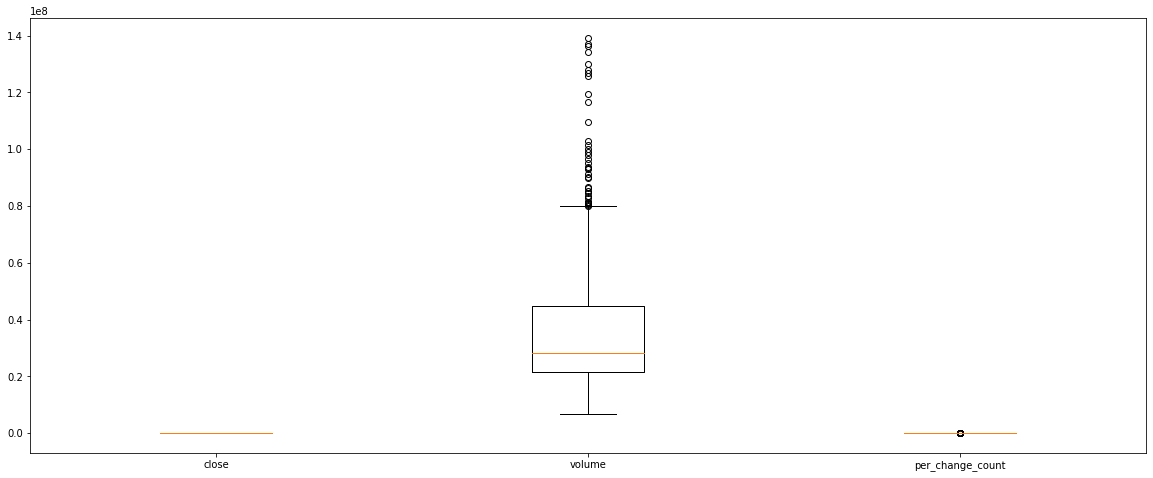

upper whisker [close, volume, per_change_count]: [733, 79976304, 12]
lower whisker [close, volume, per_change_count]: [182.75999450683997, 6865683.0, -12.0]


In [74]:

def get_box_plot_data(labels, bp):
    lower = []
    upper = []

    for i in range(len(labels)):
        dict1 = {}
        dict1['label'] = labels[i]
        a = int(bp['whiskers'][(i*2)+1].get_ydata()[1])
        b = bp['whiskers'][i*2].get_ydata()[1]
        upper.append(a)
        lower.append(b)

    return upper, lower

fig = plt.gcf()
fig.set_size_inches(20, 8)
labels = ['close', 'volume', 'per_change_count']
bp = plt.boxplot([df['close'], df['volume'], df['per_change_count']], labels=labels)
plt.show()
upper, lower = get_box_plot_data(labels, bp)
print('upper whisker [close, volume, per_change_count]:', upper)
print('lower whisker [close, volume, per_change_count]:', lower)

In [60]:
#Calculate Ouliers
close = []
volume = []
per_change_count = []
max_close = df['close'].max()
min_close = df['close'].min()
print(max_close)

for i, d in enumerate(df['close']):
  if (d > upper[0] and (d - max_close) > 10) or (d < lower[0] and (d - min_close) > 10):
    close.append(d)
  if (df['volume'].iloc[i] > upper[1]) or (df['volume'].iloc[i] < lower[1]):
    volume.append(df['volume'].iloc[i])
  if (df['per_change_count'].iloc[i] > upper[2]) or (df['per_change_count'].iloc[i] < lower[2]):
    per_change_count.append(df['per_change_count'].iloc[i])

print(sorted(close))
print(sorted(volume))
print(sorted(per_change_count))


733.29998779297
[]
[80092600, 80306000, 80773696, 81111200, 81518200, 81559000, 81559904, 82931504, 83475600, 84665400, 85235504, 86476000, 86861296, 89873600, 90181504, 91283504, 93133200, 93504896, 93770704, 95271504, 96465760, 97845904, 99064896, 100039504, 101508896, 103058200, 109642800, 116597000, 119437000, 125804800, 126727600, 127830496, 129868304, 134186200, 136427504, 136902208, 139243296]
[-465, -243, -230, -193, -122, -84, -54, -47, -40, -37, -35, -35, -33, -33, -31, -30, -30, -26, -25, -23, -21, -21, -20, -19, -19, -18, -18, -17, -17, -17, -16, -16, -15, -14, -14, -14, -13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 15, 15, 15, 18, 19, 19, 20, 22, 23, 23, 23, 24, 24, 27, 30, 33, 34, 35, 39, 40, 40, 41, 44, 49, 62, 111, 125, 128, 195, 203]


37


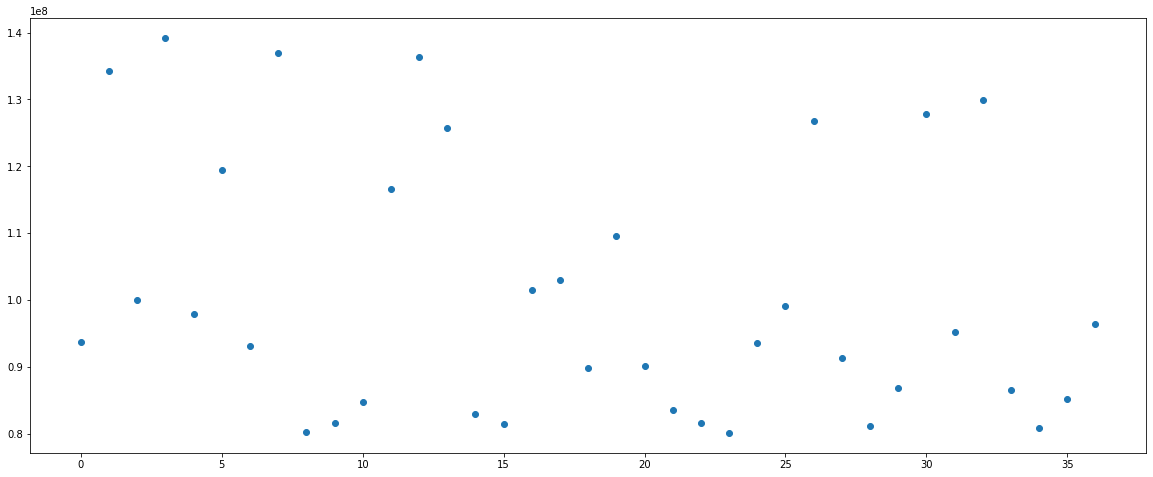

In [75]:
x = [x for x in range(len(volume))]
print(len(x))
fig = plt.gcf()
fig.set_size_inches(20, 8)
plt.scatter(x, volume) 
plt.show() 

76


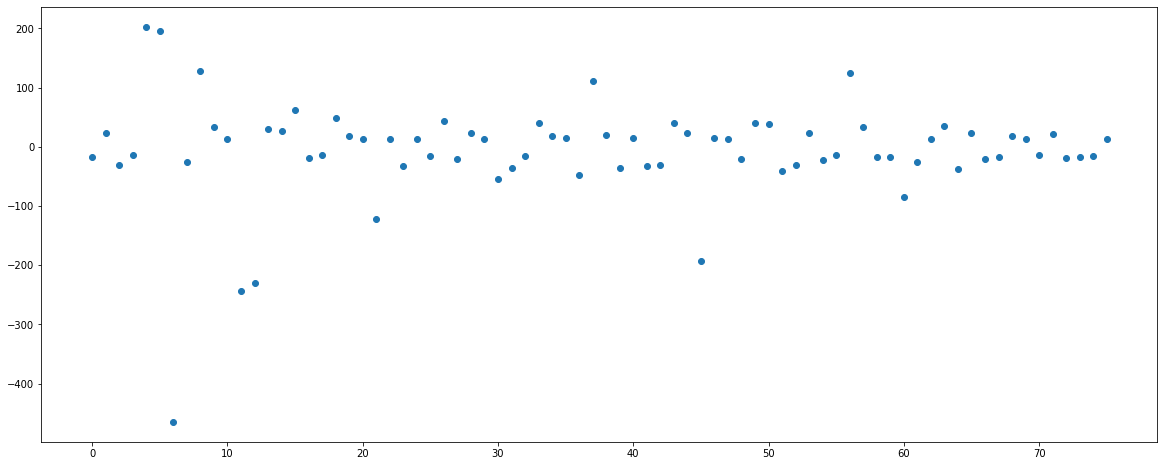

In [76]:
x = [x for x in range(len(per_change_count))]
print(len(x))
fig = plt.gcf()
fig.set_size_inches(20, 8)
plt.scatter(x, per_change_count) 
plt.show() 

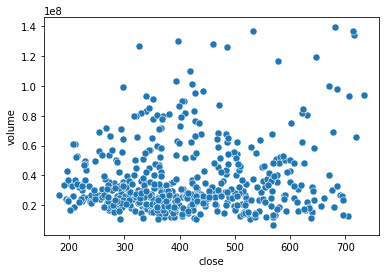

In [77]:
ax = sns.scatterplot(x='close', y='volume', data=df, s=50)

In [78]:
mn = df['volume'].mean()
mn

36647154.38003839

In [80]:
sd = df['volume'].std()
sd

23685201.90810193

In [93]:

final_list = [x for x in df['volume'] if (x > mn - 2 * sd)]
final_list = [x for x in final_list if (x < mn + 2 * sd)]
print(len(final_list))
final_list

ff = list(set(df['volume'].values.tolist()) - set(final_list))
print(len(ff))


493
28


In [94]:
d = df['volume'].values.tolist()[:200]
final_list = [x for x in d if (x > mn - 2 * sd)]
final_list = [x for x in final_list if (x < mn + 2 * sd)]
print(len(final_list))
final_list

ff = list(set(d) - set(final_list))
print(len(ff))

173
27


In [97]:
mn = df['per_change_count'].mean()
sd = df['per_change_count'].std()
final_list = [x for x in df['per_change_count'] if (x > mn - 2 * sd)]
final_list = [x for x in final_list if (x < mn + 2 * sd)]
print(len(final_list))
final_list

ff = list(set(df['per_change_count'].values.tolist()) - set(final_list))
print(len(ff))


510
11


In [98]:
mn = df['close'].mean()
sd = df['close'].std()
final_list = [x for x in df['per_change_count'] if (x > mn - 2 * sd)]
final_list = [x for x in final_list if (x < mn + 2 * sd)]
print(len(final_list))
final_list

ff = list(set(df['per_change_count'].values.tolist()) - set(final_list))
print(len(ff))

2
74


In [3]:
# from sklearn import preprocessing
# dfs = df[['close', 'volume']]
# x = dfs.values #returns a numpy array
# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(x)
# dfs = pd.DataFrame(x_scaled)
# dfs.columns = ['close', 'volume']
# dfs.head()
dfs = df.copy()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


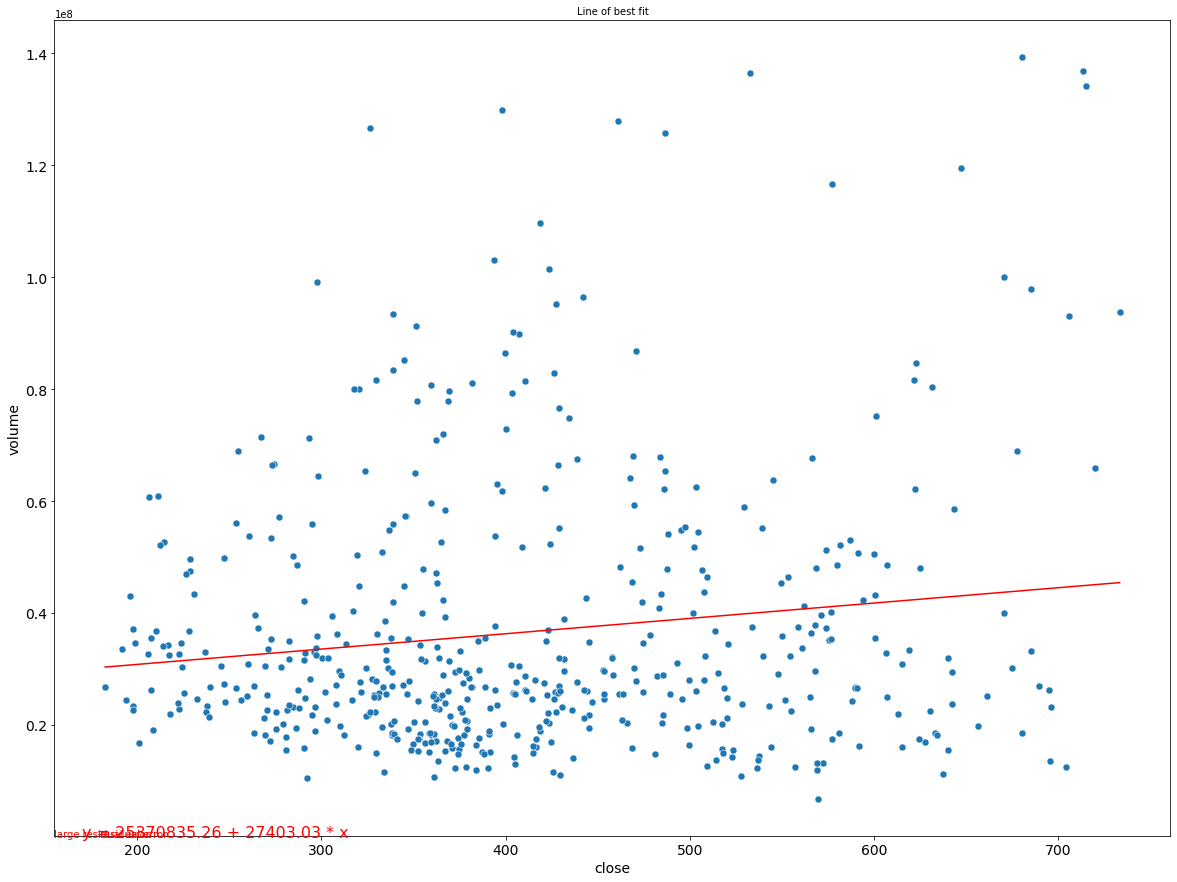

In [7]:
from sklearn.linear_model import LinearRegression

# linear model
linear_regression = LinearRegression()
# fit the linear model - calculate the coefficients 
linear_regression.fit(dfs[['close']], dfs['volume'])
# make predictions using the linear model
weight_predicted = linear_regression.predict(dfs[['close']])

# scatter plot - weight and height of 100 women
sns.scatterplot(x='close', y='volume', data=dfs, s=50)
# line plot showing the regression line
sns.lineplot(dfs.close, weight_predicted, color='red')

# coefficients learned during training
intercept = linear_regression.intercept_
slope = linear_regression.coef_[0]
fig = plt.gcf()
fig.set_size_inches(20, 15)
# regression line
plt.text(170, 95, 'y = {:.2f} + {:.2f} * x'.format(intercept, slope), fontsize=16, color='red')

# annotation showing a residual error 
plt.annotate('', xy=(179.35,83), xytext=(179.35,77),
            arrowprops={'arrowstyle': '<->', 'ec': 'red'}, va='center')
plt.text(180, 79.5, 'residual error', color='red')

plt.annotate('', xy=(165,85), xytext=(165,61),
            arrowprops={'arrowstyle': '<->', 'ec': 'red'}, va='center')
plt.text(155, 73, 'large residual error', color='red')

plt.annotate('Outlier', xy=(165,85), xytext=(160,90), fontsize=14,
            arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox = dict(boxstyle="round", fc="0.8"))

# ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# labels and title
plt.xlabel('close', fontsize=14)
plt.ylabel('volume', fontsize=14)
plt.title('Line of best fit', fontsize=10);

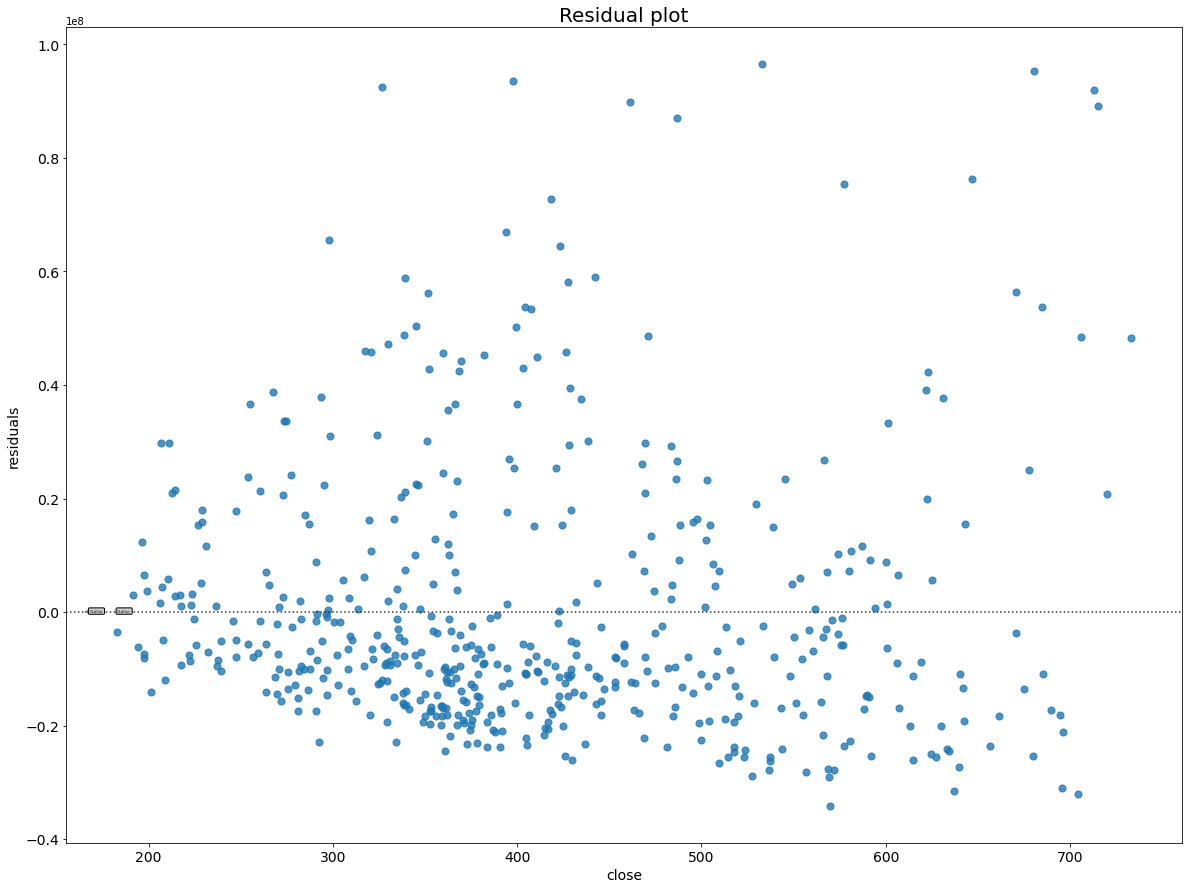

In [10]:
# residual plot with seaborn library
sns.residplot(x='close', y='volume', data=df, scatter_kws=dict(s=50))

# annotations indicating an outlier
plt.annotate('Outlier', xy=(165,24), xytext=(168,22), fontsize=4,
            arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox = dict(boxstyle="round", fc="0.8"))

plt.annotate('Outlier', xy=(190,6), xytext=(183,4), fontsize=4,
            arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox = dict(boxstyle="round", fc="0.8"))
fig = plt.gcf()
fig.set_size_inches(20, 15)
# ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# labels and title
plt.xlabel('close', fontsize=14)
plt.ylabel('residuals', fontsize=14)
plt.title('Residual plot', fontsize=20);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


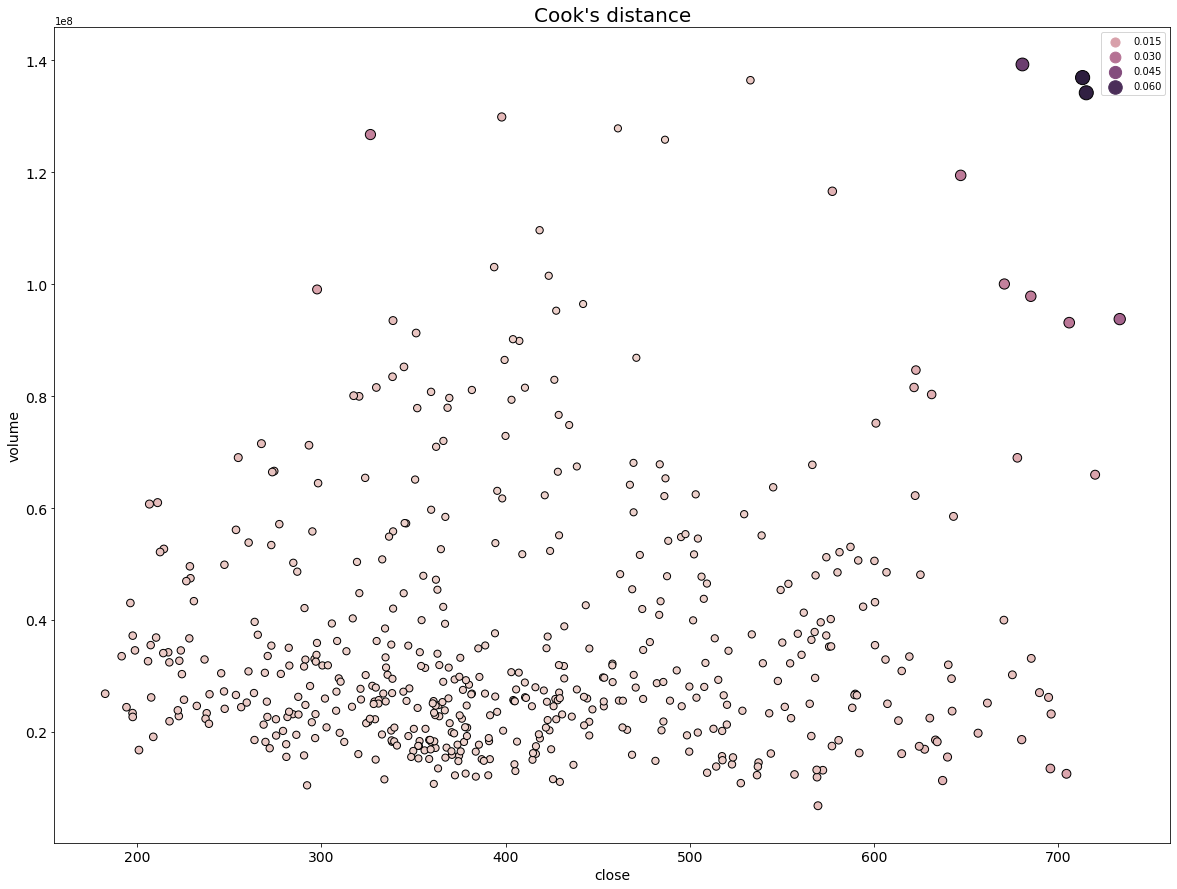

In [12]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import OLSInfluence

# fit the regression model using statsmodels library 
f = 'close ~ volume'
model = ols(formula=f, data=df).fit()

# calculate the cooks_distance - the OLSInfluence object contains multiple influence measurements
cook_distance = OLSInfluence(model).cooks_distance
(distance, p_value) = cook_distance
fig = plt.gcf()
fig.set_size_inches(20, 15)
# scatter plot - x axis (independent variable height), y-axis (dependent variable weight), size and color of the marks according to its cook's distance
sns.scatterplot(df.close, df.volume, hue=distance, size=distance, sizes=(50, 200), edgecolor='black', linewidth=1)

# ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# labels and title
plt.xlabel('close', fontsize=14)
plt.ylabel('volume', fontsize=14)
plt.title('Cook\'s distance', fontsize=20);

In [24]:
import scipy.stats as stats
c = df['close'].values.tolist()
v = df['volume'].values.tolist()
p = df['per_change_count'].values.tolist()

dfs = df[['close', 'volume', 'per_change_count']]

z_scores = stats.zscore(dfs)
print(len(dfs.index))

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = dfs[filtered_entries]

print(new_df.columns)
print(len(new_df.index))
new_df
print(sorted(list(set(df['close'].values.tolist()) - set(new_df['close'].values.tolist()))))
print(sorted(list(set(df['volume'].values.tolist()) - set(new_df['volume'].values.tolist()))))
print(sorted(list(set(df['per_change_count'].values.tolist()) - set(new_df['per_change_count'].values.tolist()))))

521
Index(['close', 'volume', 'per_change_count'], dtype='object')
500
[226.78999328613, 254.9700012207, 284.85000610352, 326.70001220703, 338.95001220703, 362.35000610352006, 363.70999145508006, 381.75, 397.95001220702994, 399.5, 418.5, 461.0, 486.54998779297006, 486.79998779297006, 532.90002441406, 577.34997558594, 606.75, 647.0, 680.5, 713.1500244140599, 715.1500244140599]
[24825398, 46975420, 48553476, 50247800, 65331300, 69037784, 70967200, 81111200, 86476000, 93504896, 109642800, 116597000, 119437000, 125804800, 126727600, 127830496, 129868304, 134186200, 136427504, 136902208, 139243296]
[-465, -243, -230, -193, -122, 111, 125, 128, 195, 203]


In [34]:
from numpy import percentile
data = df['volume'].values.tolist()
q25, q75 = percentile(data, 25), percentile(data, 75)
iqr = q75 - q25
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
# identify outliers
outliers = [x for x in data if x < lower or x > upper]
print(len(outliers))

37
